# Função *teste_z2* para o teste de hipótese da diferença entre médias

A função *teste_z2* assume que as amostras são independentes e que $\sigma_1$ e $\sigma_2$ são conhecidos. Então, decide sobre a validade da hipótese nula acerca da diferença entre as médias.

In [1]:
from scipy import stats as st

def teste_z2(xbarra_1=None, sig_1=None, n_1=None,
             xbarra_2=None, sig_2=None, n_2=None,
             alpha=0.05, teste='bilateral'):
  '''Função para teste de hipótese da diferença entre as médias populacionais,
     com nível de significância alpha, supondo desvios padrão populacionais
     sig_1 e sig_2 conhecidos. Forneça as médias amostrais xbarra_1 e xbarra_2,
     os tamanhos das amostras n_1 e n_2 e  informe o tipo de teste: unilateral
     à esquerda ('esq'), unilateral à direita ('dir') ou bilateral ('bilateral').'''
  # Criação da distribuição normal padrão
  dist_padrao = st.norm(loc=0, scale=1)
  # Cálculo da estatística de teste padronizada
  z = (xbarra_1-xbarra_2)/(sig_1**2/n_1 + sig_2**2/n_2)**0.5
  # Hipótese nula inicialmente validade
  rejeicao = False
  # Cálculo do z crítico, de acordo com o tipo de teste
  if teste == 'esq':
    z0 = dist_padrao.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if z <= z0:
      rejeicao = True
  elif teste == 'dir':
    z0 = dist_padrao.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if z >= z0:
      rejeicao = True
  elif teste == 'bilateral':
    z0 = dist_padrao.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de z à região de rejeição
    if (z <= z0) or (z >= -z0):
      rejeicao = True
  # Saída - Conclusão do teste
  print('*** Teste de hipótese para a diferença entre médias populacionais ***')
  print('-> Desvios padrão populacionais conhecidos')
  if tipo == 'bilateral':
    print(f'-> Teste {tipo} com z_padrão = {z:.6f}, z01 = {z0:.6f} e z02 = {-z0:.6f}')
  else:
    print(f'-> Teste {tipo} com z_padrão = {z:.6f} e z0 = {z0:.6f}')
  if rejeicao:
    print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
  else:
    print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return z, z0

# Exercício 01

Um grupo de acompanhamento de cartão de crédito afirma que existe diferença entre as médias dos débitos em cartões de crédito de domicílios na Califórnia e em Illinois. Os resultados de uma pesquisa de 250 domicílios de cada estado estão na tabela a seguir.

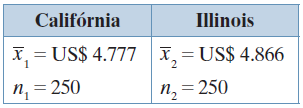

As duas amostras são independentes. Suponha que $\sigma_1=$ US$\$$1.045 para a Califórnia e $\sigma_2=$ US$\$$ 1.350 para Illinois. O resultado confirma a afirmação do grupo? Use $\alpha = 0,05$. (Fonte: *PlasticEconomy.com*)

In [2]:
# H0: mu1 = mu2
# Ha: mu1 != mu2 (afirmação)
zpad, z0 = teste_z2(xbarra_1=4777, sig_1=1045, n_1=250, xbarra_2=4866,
                    sig_2=1350, n_2=250, alpha=0.05, teste='bilateral')

*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais conhecidos
-> Teste bilateral com z_padrão = -0.824283, z01 = -1.959964 e z02 = 1.959964
Hipótese nula NÃO rejeitada ao nível de significância 5.0%


# Exercício 02

Uma pesquisa indica que os salários médios anuais de técnicos de ciências forenses trabalhando para os governos municipais e estaduais norte-americanos são US$\$$ 55.950 e US$\$$ 51.100, respectivamente. A pesquisa inclui uma amostra selecionada aleatoriamente de tamanho 100 para cada ramo governamental. 

Suponha que os desvios padrão populacionais são US$\$$ 6.200 (município) e US$\$$ 5.575 (estado). As duas amostras são independentes. Para $\alpha = 0,10$, há evidência suficiente para concluir que existe uma diferença nos salários médios anuais? (Fonte: *U.S. Bureau of Labor Statistics*)

In [3]:
# H0: mu1 = mu2
# Ha: mu1 != mu2 (afirmação)
zpad, z0 = teste_z2(xbarra_1=55950, sig_1=6200, n_1=100, xbarra_2=51100,
                    sig_2=5575, n_2=100, alpha=0.10, teste='bilateral')

*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais conhecidos
-> Teste bilateral com z_padrão = 5.816810, z01 = -1.644854 e z02 = 1.644854
Hipótese nula rejeitada ao nível de significância 10.0%


# Exercício 03

Uma agência de viagem afirma que o custo médio diário de refeições e acomodação para férias no Texas é menor que o custo médio diário na Virgínia. A tabela a seguir mostra os resultados de uma pesquisa aleatória com turistas em cada estado.

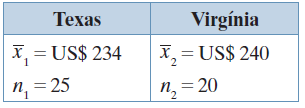

As duas amostras são independentes. Suponha que $\sigma_1=$ US$\$$ 19 para o Texas e $\sigma_2=$ US$\$$ 24 para a Virgínia e que ambas as populações são normalmente distribuídas.

Para $\alpha = 0,01$, há evidência suficiente para confirmar a afirmação? (Fonte: *American Automobile Association*)

In [4]:
# H0: mu1 >= mu2
# Ha: mu1 < mu2 (afirmação)
zpad, z0 = teste_z2(xbarra_1=234, sig_1=19, n_1=25, xbarra_2=240,
                    sig_2=24, n_2=20, alpha=0.01, teste='esq')

*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais conhecidos
-> Teste unilateral à esquerda com z_padrão = -0.912449 e z0 = -2.326348
Hipótese nula NÃO rejeitada ao nível de significância 1.0%


# Exercício 04 - A função *ztest* do Python

Suponha que os níveis de QI entre indivíduos em duas cidades diferentes sejam normalmente distribuídos, com desvios padrão conhecidos.

Uma pesquisadora acredita que o nível médio de QI entre os indivíduos da cidade A e da cidade B são diferentes, então ela seleciona uma amostra aleatória simples de 20 indivíduos de cada cidade e registra seus níveis de QI.

É possível corroborar a afirmação da pesquisadora à um nível de significância de 5%?

In [6]:
from statsmodels.stats.weightstats import ztest as ztest
# H0: mu1 = mu2
# Ha: mu1 != mu2 (afirmação)

# Níveis de QI para 20 indivíduos da cidade A
cidadeA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
           105, 109, 109, 109, 110, 112, 112, 113, 114, 114]
# Níveis de QI para 20 indivíduos da cidade B
cidadeB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
           109, 114, 115, 116, 117, 117, 128, 129, 130, 133]
# Função ztest para duas amostras
zpad, p_valor = ztest(x1=cidadeA, x2=cidadeB, value=0, alternative='two-sided')
# Conclusão do teste
alpha = 0.05
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

Hipótese nula rejeitada ao nível de significância 5.0%


# Função *teste_t2* para o teste de hipótese da diferença entre médias

A função *teste_t2* assume que as amostras são independentes e que $\sigma_1$ e $\sigma_2$ são desconhecidos. Então, decide sobre a validade da hipótese nula acerca da diferença entre as médias.

In [8]:
def teste_t2(xbarra_1=None, s_1=None, n_1=None,
             xbarra_2=None, s_2=None, n_2=None,
             alpha=0.05, var='=', teste='bilateral'):
  '''Função para teste de hipótese da diferença entre as médias populacionais,
     com nível de significância alpha, supondo desvios padrão populacionais
     sig_1 e sig_2 conhecidos. Forneça as médias amostrais xbarra_1 e xbarra_2,
     os tamanhos das amostras n_1 e n_2 e  informe o tipo de teste: unilateral
     à esquerda ('esq'), unilateral à direita ('dir') ou bilateral ('bilateral').'''
  # Graus de liberdade e erro padrão
  if var == '=':
    gl = n_1 + n_2 - 2
    sig_chapeu = (((n_1-1)*s_1**2 + (n_2-1)*s_2**2)/gl)**0.5
    erro_pad = sig_chapeu*(1/n_1 + 1/n_2)**0.5
  elif var == '!=':
    gl = min(n_1-1, n_2-1)
    erro_pad = (s_1**2/n_1 + s_2**2/n_2)**0.5
  # Criação da distribuição t
  dist_t = st.t(df=gl)
  # Cálculo da estatística de teste padronizada
  t = (xbarra_1 - xbarra_2)/erro_pad
  # Hipótese nula inicialmente validade
  rejeicao = False
  # Cálculo do t crítico, de acordo com o tipo de teste
  if teste == 'esq':
    t0 = dist_t.ppf(alpha)
    tipo = 'unilateral à esquerda'
    # Decisão sobre pertinência de z à região de rejeição
    if t <= t0:
      rejeicao = True
  elif teste == 'dir':
    t0 = dist_t.ppf(1-alpha)
    tipo = 'unilateral à direita'
    # Decisão sobre pertinência de z à região de rejeição
    if t >= t0:
      rejeicao = True
  elif teste == 'bilateral':
    t0 = dist_t.ppf(alpha/2)
    tipo = 'bilateral'
    # Decisão sobre pertinência de z à região de rejeição
    if (t <= t0) or (t >= -t0):
      rejeicao = True
  # Saída - Conclusão do teste
  print('*** Teste de hipótese para a diferença entre médias populacionais ***')
  print('-> Desvios padrão populacionais conhecidos')
  if tipo == 'bilateral':
    print(f'-> Teste {tipo} com t_padrão = {t:.6f}, t01 = {t0:.6f} e t02 = {-t0:.6f}')
  else:
    print(f'-> Teste {tipo} com t_padrão = {t:.6f} e t0 = {t0:.6f}')
  if rejeicao:
    print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
  else:
    print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
  return t, t0

# Exercício 05

Os resultados de um teste estadual de matemática para amostras aleatórias de estudantes ensinados por dois professores diferentes na mesma escola estão na tabela a seguir.

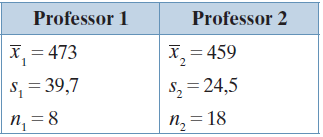

Podemos concluir que há diferença nas pontuações médias dos testes de matemática para todos os estudantes dos dois professores? Use $\alpha = 0,10$. Suponha que as populações são normalmente distribuídas e que as variâncias populacionais não são iguais.

In [9]:
# H0: mu1 = mu2
# Ha: mu1 != mu2 (afirmação)
tpad, t0 = teste_t2(xbarra_1=473, s_1=39.7, n_1=8, xbarra_2=459, s_2=24.5,
                    n_2=18, alpha=0.10, var='!=', teste='bilateral')


*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais conhecidos
-> Teste bilateral com t_padrão = 0.922414, t01 = -1.894579 e t02 = 1.894579
Hipótese nula NÃO rejeitada ao nível de significância 10.0%


# Exercício 06

Os ganhos anuais de 19 pessoas com diploma de ensino médio e 16 pessoas com um diploma de tecnólogo são mostrados na tabela a seguir.

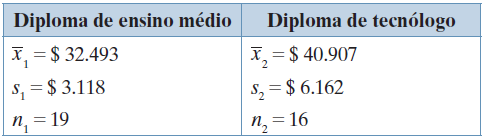

Você pode concluir que há uma diferença nos ganhos médios anuais baseado no nível de instrução? Use $\alpha = 0,01$. Suponha que as populações são normalmente distribuídas e que as variâncias populacionais não são iguais.

In [10]:
# H0: mu1 = mu2
# Ha: mu1 != mu2 (afirmação)
tpad, t0 = teste_t2(xbarra_1=32493, s_1=3118, n_1=19, xbarra_2=40907, s_2=6162,
                    n_2=16, alpha=0.01, var='!=', teste='bilateral')

*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais conhecidos
-> Teste bilateral com t_padrão = -4.953853, t01 = -2.946713 e t02 = 2.946713
Hipótese nula rejeitada ao nível de significância 1.0%


# Exercício 07

Um fabricante afirma que o custo médio de operação por milha de seus sedans é menor que o do principal concorrente. Você conduz um estudo usando 30 sedans selecionados aleatoriamente do fabricante e 32 do principal concorrente. Os resultados estão na tabela a seguir.

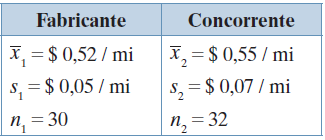

Para $\alpha = 0,05$, você pode concordar com a afirmação do fabricante? Suponha
que as variâncias populacionais são iguais. (Adaptado de: *American Automobile Association*)

In [11]:
# H0: mu1 >= mu2
# Ha: mu1 < mu2 (afirmação)
tpad, t0 = teste_t2(xbarra_1=0.52, s_1=0.05, n_1=30, xbarra_2=0.55, s_2=0.07,
                    n_2=32, alpha=0.05, var='=', teste='esq')

*** Teste de hipótese para a diferença entre médias populacionais ***
-> Desvios padrão populacionais conhecidos
-> Teste unilateral à esquerda com t_padrão = -1.930302 e t0 = -1.670649
Hipótese nula rejeitada ao nível de significância 5.0%


# Exercício 08 - A função *ttest_ind* do Pyhton

Um pesquisador deseja comparar a eficácia do uso de cloreto de amônio e da uréia no rendimento de grãos do arrozal. Para tanto, conduziu um experimento em que áreas equivalentes de cultivo foram fertilizadas, cada uma com um tipo de produto.

Ao nível de significância de 5%, é possível afirmar que os fertilizantes têm a mesma eficácia? Responda assumindo que as variâncias das populações são iguais. A seguir, repita sob a hipótese de que as variâncis populacionais são diferentes. 



In [14]:
# H0: mu1 = mu2 (afirmação)
# Ha: mu1 != mu2

# Conjunto de dados
cloreto_de_amonio = [13.4, 10.9, 11.2, 11.8, 14, 15.3,
                     14.2, 12.6, 17, 16.2, 16.5, 15.7]
ureia = [12, 11.7, 10.7, 11.2, 14.8, 14.4,
         13.9, 13.7, 16.9, 16, 15.6, 16]
# Função ttest_ind para duas amostras
# Assumindo variâncias iguais para as populações
t_pad,p_valor=st.ttest_ind(a=cloreto_de_amonio, b=ureia,
                           equal_var=True, alternative='two-sided')
# Conclusão do teste
alpha = 0.05
print('*** Assumindo variâncias iguais para as populações:')
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')
# Assumindo variâncias diferentes para as populações
t_pad,p_valor=st.ttest_ind(a=cloreto_de_amonio, b=ureia,
                           equal_var=False, alternative='two-sided')
# Conclusão do teste
alpha = 0.05
print('*** Assumindo variâncias diferentes para as populações:')
if p_valor <= alpha:
  print(f'Hipótese nula rejeitada ao nível de significância {alpha*100}%')
else:
  print(f'Hipótese nula NÃO rejeitada ao nível de significância {alpha*100}%')

*** Assumindo variâncias iguais para as populações:
Hipótese nula NÃO rejeitada ao nível de significância 5.0%
*** Assumindo variâncias diferentes para as populações:
Hipótese nula NÃO rejeitada ao nível de significância 5.0%
